<a href="https://colab.research.google.com/github/yananma/useful_program/blob/master/DL/PyTorch/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression

In [0]:
import torch 
import torch.nn as nn 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [0]:
# Hyper parameters 
input_size = 1 
output_size = 1 
num_epochs = 3000 
learning_rate = 0.001 

In [0]:
# data 
x = np.random.rand(256)
noise = np.random.randn(256) / 4 
y = 5 * x + 7 + noise

x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')

In [0]:
# model
model = nn.Linear(input_size, output_size)

In [0]:
# loss and optimizer 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
# train 
loss_dict = []
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # backward and oprimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_dict.append(loss.item())
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [100/3000], Loss: 52.9107
Epoch [200/3000], Loss: 31.2525
Epoch [300/3000], Loss: 18.4709
Epoch [400/3000], Loss: 10.9278
Epoch [500/3000], Loss: 6.4762
Epoch [600/3000], Loss: 3.8491
Epoch [700/3000], Loss: 2.2988
Epoch [800/3000], Loss: 1.3838
Epoch [900/3000], Loss: 0.8438
Epoch [1000/3000], Loss: 0.5251
Epoch [1100/3000], Loss: 0.3371
Epoch [1200/3000], Loss: 0.2261
Epoch [1300/3000], Loss: 0.1606
Epoch [1400/3000], Loss: 0.1219
Epoch [1500/3000], Loss: 0.0991
Epoch [1600/3000], Loss: 0.0856
Epoch [1700/3000], Loss: 0.0776
Epoch [1800/3000], Loss: 0.0729
Epoch [1900/3000], Loss: 0.0701
Epoch [2000/3000], Loss: 0.0685
Epoch [2100/3000], Loss: 0.0675
Epoch [2200/3000], Loss: 0.0669
Epoch [2300/3000], Loss: 0.0666
Epoch [2400/3000], Loss: 0.0664
Epoch [2500/3000], Loss: 0.0663
Epoch [2600/3000], Loss: 0.0662
Epoch [2700/3000], Loss: 0.0661
Epoch [2800/3000], Loss: 0.0661
Epoch [2900/3000], Loss: 0.0661
Epoch [3000/3000], Loss: 0.0660


In [7]:
[w, b] = model.parameters()
print(w.item(), b.item())

4.941791534423828 7.05049991607666


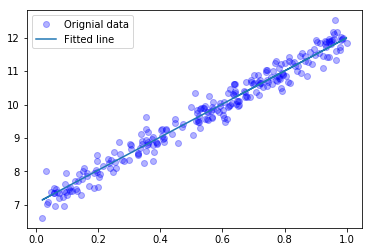

In [8]:
# plot
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'bo', label='Orignial data', alpha=0.3)
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

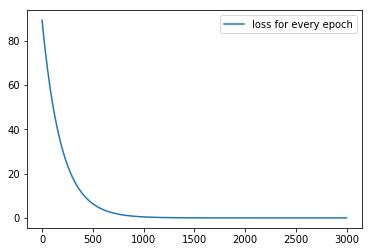

In [9]:
plt.plot(loss_dict, label='loss for every epoch')
plt.legend()
plt.show()

In [0]:
# save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')